In [1]:
# first let's make sure you have internet enabled
import requests
requests.get('http://www.google.com',timeout=10).ok

True

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
!pip install --upgrade kaggle-environments
!pip install python-chess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: kaggle-environments
    Found existing installation: kaggle-environments 1.16.10
    Uninstalling kaggle-environments-1.16.10:
      Successfully uninstalled kaggle-environments-1.16.10
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 3.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148497 sha256=9e1fcdfb42a7b9b3721156715401e21ac9871e681833f522c3edbcfb521710b4
  Stored in directory: /root/.cache/pip/wheels/2e/2d/23/1bfc95db984ed3ecbf6764167dc7526d0ab521cf9a9852544e
Successfully built chess


In [4]:
from kaggle_environments import make
env = make("chess", debug=True)

/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

In [5]:
def random_agent(observation, configuration):
    from random import choice
    return choice(observation.legal_moves)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



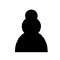
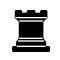
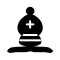
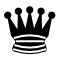
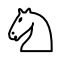
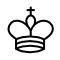
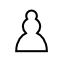
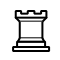
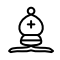
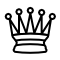
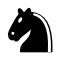
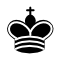

In [6]:
result = env.run(["random", "random"])
env.render(mode="ipython", width=1000, height=1000) 

In [7]:
%%writefile submission.py
import chess
import random

def chess_bot(obs, config):
    """
    Chess bot that makes random moves.
    
    Args:
        obs: An object containing the current board state and other game information.
        config: An object containing game configuration (not used here).
    
    Returns:
        A string representing the chosen move in UCI notation (e.g., "e2e4").
    """
    # Parse the current board state using python-chess
    board = chess.Board(obs.board)
    
    # Get all legal moves
    legal_moves = list(board.legal_moves)
    
    # Choose a random move
    move = random.choice(legal_moves)
    
    # Return the move in UCI notation
    return move.uci()

Writing submission.py


In [8]:
%%writefile submission.py
import chess
import random

def chess_bot(obs, config):
    board = chess.Board(obs.board)
    legal_moves = list(board.legal_moves)
    move = random.choice(legal_moves)
    return move.uci()

Overwriting submission.py



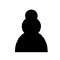
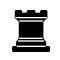
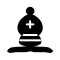
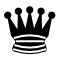
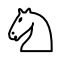
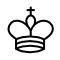
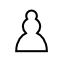
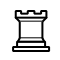
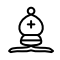
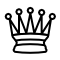
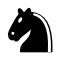
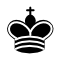

In [9]:
from kaggle_environments import make
from submission import chess_bot   
env = make("chess", debug=True)
env.run([chess_bot, "random"])
env.render(mode="ipython", width=1000, height=1000)

In [10]:
def evaluate_board(board):
    """
    Evaluate the board state based on piece values.
    """
    piece_values = {
        chess.PAWN: 1,
        chess.KNIGHT: 3,
        chess.BISHOP: 3,
        chess.ROOK: 5,
        chess.QUEEN: 9,
        chess.KING: 100
    }
    score = 0
    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
            value = piece_values[piece.piece_type]
            if piece.color == board.turn:
                score += value
            else:
                score -= value
    return score